# A baseline mock EoR signal simulation with $P(k) = A_0 k^{-2}$

Zachary Martinot and the HERA Validation Team

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup-and-Metadata" data-toc-modified-id="Setup-and-Metadata-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup and Metadata</a></span><ul class="toc-item"><li><span><a href="#Abstract" data-toc-modified-id="Abstract-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Abstract</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Description" data-toc-modified-id="Description-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Software" data-toc-modified-id="Software-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Software</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#General-functions" data-toc-modified-id="General-functions-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>General functions</a></span></li></ul></li><li><span><a href="#hera_pspec-estimates-from-a-single-realization" data-toc-modified-id="hera_pspec-estimates-from-a-single-realization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><code>hera_pspec</code> estimates from a single realization</a></span></li><li><span><a href="#Initial-comparison-to-input-power-spectrum" data-toc-modified-id="Initial-comparison-to-input-power-spectrum-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Initial comparison to input power spectrum</a></span></li><li><span><a href="#The-aliased-power-spectrum" data-toc-modified-id="The-aliased-power-spectrum-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The aliased power spectrum</a></span><ul class="toc-item"><li><span><a href="#Estimates-compared-to-expected-aliasing" data-toc-modified-id="Estimates-compared-to-expected-aliasing-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Estimates compared to expected aliasing</a></span></li><li><span><a href="#Residuals-using-expected-aliasing" data-toc-modified-id="Residuals-using-expected-aliasing-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Residuals using expected aliasing</a></span></li></ul></li><li><span><a href="#More-realizations" data-toc-modified-id="More-realizations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>More realizations</a></span><ul class="toc-item"><li><span><a href="#Ensemble-averaged-estimates" data-toc-modified-id="Ensemble-averaged-estimates-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Ensemble averaged estimates</a></span></li><li><span><a href="#Enemble-average-residuals" data-toc-modified-id="Enemble-average-residuals-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Enemble average residuals</a></span></li><li><span><a href="#Histograms-of-residuals-over-ensemble-and-$k$" data-toc-modified-id="Histograms-of-residuals-over-ensemble-and-$k$-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Histograms of residuals over ensemble and $k$</a></span></li></ul></li></ul></div>

## Setup and Metadata

### Abstract

The goal of this notebook is to show that the simplest `hera_pspec` estimator recovers the power spectrum from realistic visiblities in the most ideal case where the only source of emission on the sky is the cosmological signal and there are no systemic corruptions of the visibility.

### Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

import h5py
import os

import hera_pspec as hps
import pyuvdata

In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

### Description

Last executed: {{str(datetime.now())}}



- **Major Step Description:** Gaussian cosmological field with known $P(k)$ propagated to visibilities.
- **Minor Variation Description:** The input power spectrum is: $P(k) = A_0 k^{-2}$, with $A_0 =$ `1e1*(1./0.2)**-2.`. The simulated data is for an ideal 37-element HERA hex array, 8052 time samples over a full sidereal day, 1024 frequency samples in 100-200MHz, and the antenna response given by the Fagnoni simulation of the HERA dipole-feed antenna.
- **Pipelines Tested:** `hera_pspec.pspec`
- **Criteria**:
  1. The estimates produced by `pspec` are consistent with a relative difference between $\langle \hat{P}(k) \rangle$ and the known power spectrum $P(k)$ that is $\leq 0.01$.

### Summary

The results of this validation test, in reference to the outlined criteria, are
1. {Test results for criteria 1}

{Brief notes on anything else interesting that was noted during testing}

### Software

HERA software used in this validation test, with associate git commit hash:

* `pyuvdata`: {{pyuvdata.version.git_hash}}
* `hera_pspec`: {{hps.version.git_hash}}

Versions of other software used in this validation test:

* `numpy`: {{np.version.full_version}}

### Data

The following paths reflect the exact locations of all data used in this test:

In [4]:
# Paths to multiple realizations
vis_data_path_base = '/lustre/aoc/projects/hera/Validation/hera_hex37_100-200MHz_HERA_dipole_beam_pow_neg2_pspec/realization_{0}.uvh5'
vis_data_paths = [vis_data_path_base.format(str(rel)) for rel in range(0,20)]

assert all([os.path.exists(path) for path in vis_data_paths])

In [5]:
# The fiducial realization
vis_data_path0 = vis_data_paths[0]

In [6]:
# Path to beam normalization data
omegas_data_path = '/lustre/aoc/projects/hera/Validation/HERA_dipole_Omegas/HERA_dipole_Omegas.h5'
assert os.path.exists(omegas_data_path)

In [495]:
# Saved averaged power spectrum estimates from each visibility realization
uvp_avg_data_path_base = '/lustre/aoc/projects/hera/Validation/hera_hex37_100-200MHz_HERA_dipole_beam_pow_neg2_pspec/uvp_avg_realization_{0}.h5'
N_realizations = 50
uvp_avg_data_paths = [uvp_avg_data_path_base.format(str(rel)) for rel in range(N_realizations)]

assert all([os.path.exists(path) for path in uvp_avg_data_paths])

### General functions

In [7]:
# get a Vokes-I uvdata object from the input uvh5 file
def get_VI_data(vis_data_path):
    uvd = pyuvdata.UVData()
    uvd.read_uvh5(vis_data_path)
    
    # one of these days...
    xx_integer = pyuvdata.utils.polstr2num('xx')
    yy_integer = pyuvdata.utils.polstr2num('yy')
    
    xx_ind = np.argwhere(uvd.polarization_array == xx_integer)[0][0]
    yy_ind = np.argwhere(uvd.polarization_array == yy_integer)[0][0]
    
    VI_data = uvd.data_array[:,:,:,xx_ind] + uvd.data_array[:,:,:,yy_ind]
    
    uvd.select(polarizations=(-5))
    uvd.polarization_array[0] = 1
    uvd.data_array = VI_data.reshape(VI_data.shape + (1,))
    
    return uvd

In [8]:
# This is the cosmological parameter set in the input simulation
def astropyPlanck15_for_hera_pspec():
    H0 = 67.74
    h = H0/100.

    Om_b = 0.02230/h**2.
    Om_c = 0.1188/h**2.
    Om_L = 0.6911
    Om_k = 1. - (Om_b + Om_c + Om_L)

    hps_cosmo = hps.conversions.Cosmo_Conversions(Om_L=Om_L,
                                                Om_b=Om_b,
                                                Om_c=Om_c,
                                                H0=H0,)
    return hps_cosmo

## `hera_pspec` estimates from a single realization

In [12]:
%%time

# Load visibility data for the fiducial realiztion
uvdI = get_VI_data(vis_data_path0)

CPU times: user 16min 40s, sys: 18.5 s, total: 16min 59s
Wall time: 3min 13s


In [13]:
cosmo = astropyPlanck15_for_hera_pspec()

In [14]:
# Load beam data
with h5py.File(omegas_data_path, 'r') as h5f:
    Omega = h5f['Omega'].value
    Omegapp = h5f['Omegapp'].value

In [15]:
hpsb = hps.pspecbeam.PSpecBeamFromArray(Omega, Omegapp, uvdI.freq_array[0], cosmo=cosmo)

In [16]:
# Convert visibility data from Jansky to milikelvin *at the source*
nu_e = 1420405751.7667 # Hz
nu_hz = uvdI.freq_array[0]

# conversion to mK at the observer
Jy_to_mK = hpsb.Jy_to_mK(nu_hz, pol='pI')

# conversion to mK at the source
Jy_to_mK_src = (nu_e/nu_hz) * Jy_to_mK

uvdI.data_array *= Jy_to_mK_src[None,None,:,None]

In [17]:
ds = hps.PSpecData(dsets=[uvdI, uvdI], wgts=[None,None], beam=hpsb)

ds.dsets[0].vis_units = 'mK'
ds.dsets[1].vis_units = 'mK'

# 63 unique baselines, excluding auto-correlation
ant_pairs = [ant_pair for ant_pair in uvdI.get_antpairs() if ant_pair[0] != ant_pair[1]]

# 5 ~20MHz bandwidth spectral windows
edge_inds = [np.argmin(np.abs(nu_hz - nu_i)) for nu_i in 1e6*np.linspace(100.,200.,6, endpoint=True)]
spw_ranges = zip(edge_inds, edge_inds[1:])

In [ ]:
%%time
uvp = ds.pspec(ant_pairs, ant_pairs, 
               dsets=(0,1),
               pols=('pI', 'pI'),
               spw_ranges=spw_ranges,
               input_data_weight='identity',
               norm='I',
               taper='blackman-harris',
               verbose=False,
               little_h=False)

In [26]:
blpair_group = [sorted(np.unique(uvp.blpair_array))]

uvp_avg = uvp.average_spectra(blpair_groups=blpair_group, time_avg=True, inplace=False)

uvp_avg.fold_spectra()

In [27]:
keys = uvp_avg.get_all_keys()

In [28]:
pspec_est, k_est, k_nyquist = {}, {}, {}

for spw in uvp_avg.data_array.keys():
    pspec_est[spw] = uvp_avg.get_data(keys[spw])[0]
    k_est[spw] = uvp_avg.get_kparas(spw, little_h=False)
    dly = uvp.get_dlys(spw)
    if dly.size % 2 == 0:
        tau_nyquist = np.amax(dly)
    else:
        ddly = np.diff(dly)[0]

        tau_nyquist = np.amax(dly) + ddly/2.
        
    i0,i1 = spw_ranges[spw]
    spw_freqs = uvp.freq_array[i0:i1]
    z_mean = uvp.cosmo.f2z(np.mean(spw_freqs))

    k_nyquist[spw] = np.amax(tau_nyquist)*uvp.cosmo.tau_to_kpara(z_mean, little_h=False)

## Initial comparison to input power spectrum

In [29]:
def true_power_spectrum(k):
    A0 = 1e1 * (1./0.2)**-2.
    Pk = 1e6*A0 * k**-2.
    return Pk

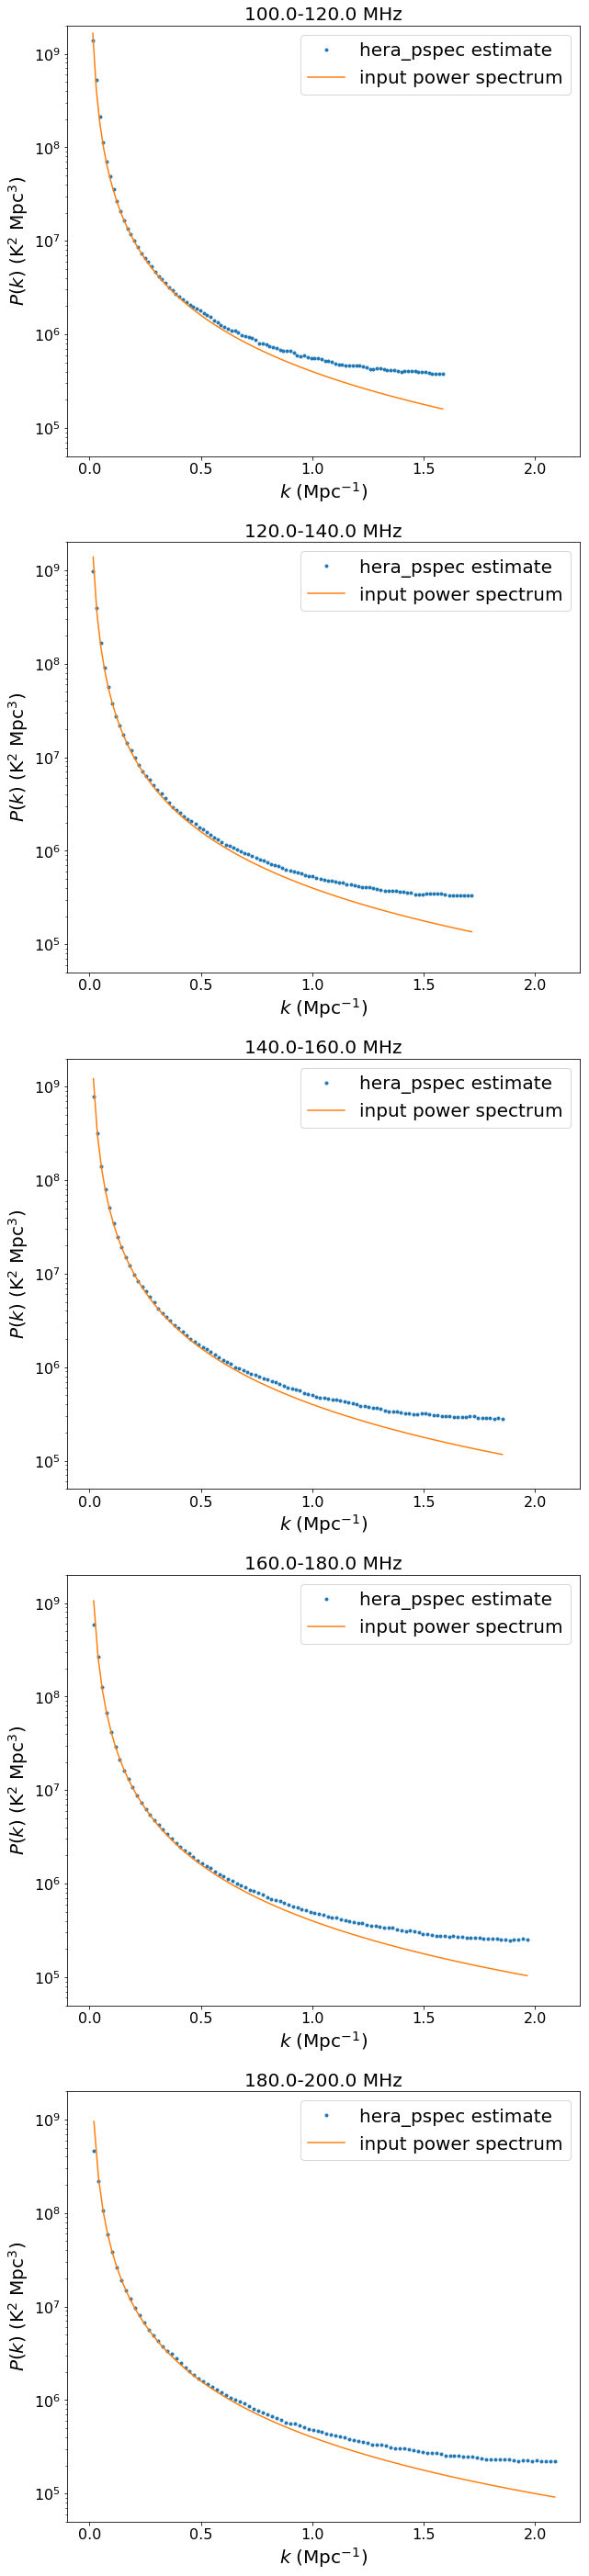

In [289]:
fig = plt.figure(figsize=(10,50))
for spw in pspec_est.keys():
    ax = fig.add_subplot(5,1,spw+1)
    ax.tick_params(labelsize=16)
    ax.plot(k_est[spw], pspec_est[spw], '.', label='hera_pspec estimate')
    ax.plot(k_est[spw], true_power_spectrum(k_est[spw]), label='input power spectrum')
    
    plt.yscale('log')
    plt.ylim(0.5e5,2e9)
    plt.xlim(-0.1,2.2)
    
    i0,i1 = spw_ranges[spw]
    spw_freqs = uvp.freq_array[i0:i1]
    z_mean = uvp.cosmo.f2z(np.mean(spw_freqs))
    
    nu0, nu1 = np.around(spw_freqs[0]*1e-6,0), np.around(spw_freqs[-1]*1e-6,0)
#     title_str = r'Redshift: {0}'.format(str(np.around(z_mean,2)))
    title_str = '{0}-{1} MHz'.format(str(nu0), str(nu1))
    plt.title(title_str, fontsize=20)
    plt.xlabel(r'$k$ (Mpc$^{-1}$)', fontsize=20)
    plt.ylabel(r'$P(k)$ (K$^2$ Mpc$^3$)', fontsize=20)
    plt.legend(fontsize=20)
    
plt.show()

**Figure 1** | The power spectrum estimates (blue points) for five ~20MHz subbands and the input power spectrum (orange line). The discrepancy is due to aliasing.

## The aliased power spectrum

The discrepancy between the true power spectrum and the estimates is due to aliasing. In general, if the power spectrum of a random function is $P(k)$ for $k \in [0, \infty)$ and that function is sampled at a rate $2 k_s$ then there will be aliasing and the power spectrum of the aliased function will be

\begin{align}
Q(k) & = P(k) + \sum_{n=1}^{\infty} P(2 n k_s - k) + P(2 n k_s + k), \text{ for } k \in (0, k_s).
\end{align}

Provided that $P(k)$ tends to zero for $k > k_s$ the aliased power spectrum can be readily computed to whatever tolerence is desired by truncating the above sum at the appropriate $n$.

However, in the particular case of the power spectrum of the present simulation we can simplify the expresion for $Q(k)$. Since $P(k) = P(-k) = \frac{A_0}{k^2}$, we obtain

\begin{align}
Q(k) & = \sum_{n=-\infty}^{\infty} P(k + 2 n k_s) \\
& = A_0 \sum_{n=-\infty}^{\infty} \frac{1}{4 k_s^2 (n - a)^2}, \qquad{} a = \frac{k}{2 k_s}
\end{align}


This sum can be computed with the residue summation theorem from complex analysis. The general result is that if $f(z)$ is an analytic function with poles $z_j$ that do not include the integers, then

\begin{align}
\sum_{n=-\infty}^{\infty} f(n) = - \sum_j Res[\pi \cot(\pi z) f(z), z_j].
\end{align}

Let $f(z) = \frac{1}{(z - a)^2}$. Since $ k < \bar{k}$ we have $ 0 < a < \frac{1}{2}$, so $a \notin \mathbb{Z}$, and the residue at $a$ is

\begin{align}
Res[\pi \cot(\pi z) \frac{1}{(z - a)^2}, a] & = \frac{d}{dz} \big( \pi \cot(\pi z) \big) |_{z=a}\\
& = - \pi^2 \csc^2(\pi a)
\end{align}

Thus, the aliased power spectrum is

\begin{align}
Q(k) = A_0 \frac{\pi^2}{4 k_s^2} \csc^2 \bigg( \frac{\pi k}{2 k_s} \bigg), \qquad k \in (0, k_s).
\end{align}

Because the DFT over uniformly spaced frequency channels is a non-uniform DFT in line-of-sight distance $r$, the aliasing is not exactly as just described. However

In [182]:
r_samples, dr_samples = {}, {}
ks_alt = {}
for spw in uvp_avg.data_array.keys():
    i0,i1 = spw_ranges[spw]
    spw_freqs = uvp_avg.freq_array[i0:i1]
    z_s = cosmo.f2z(spw_freqs)
    r_samples[spw] = np.array([cosmo.DC(z, little_h=False) for z in z_s])
    dr_samples[spw] = np.diff(r_samples[spw])
    
    ks_alt[spw] = np.pi*np.mean(1./np.abs(dr_samples[spw]))

In [185]:
ks_alt

{0: 1.5920987290390165,
 1: 1.7315808996304236,
 2: 1.8610204254379297,
 3: 1.9825272719700633,
 4: 2.0976053666144323}

In [38]:
def aliased_power_spectrum(k, k_nyquist):
    A0 = 1e1 * (1./0.2)**-2.
    
    Pk = 1e6*A0 * (np.pi)**2. * 1./(2. * k_nyquist * np.sin(np.pi*k / k_nyquist /2.))**2.
    return Pk

### Estimates compared to expected aliasing

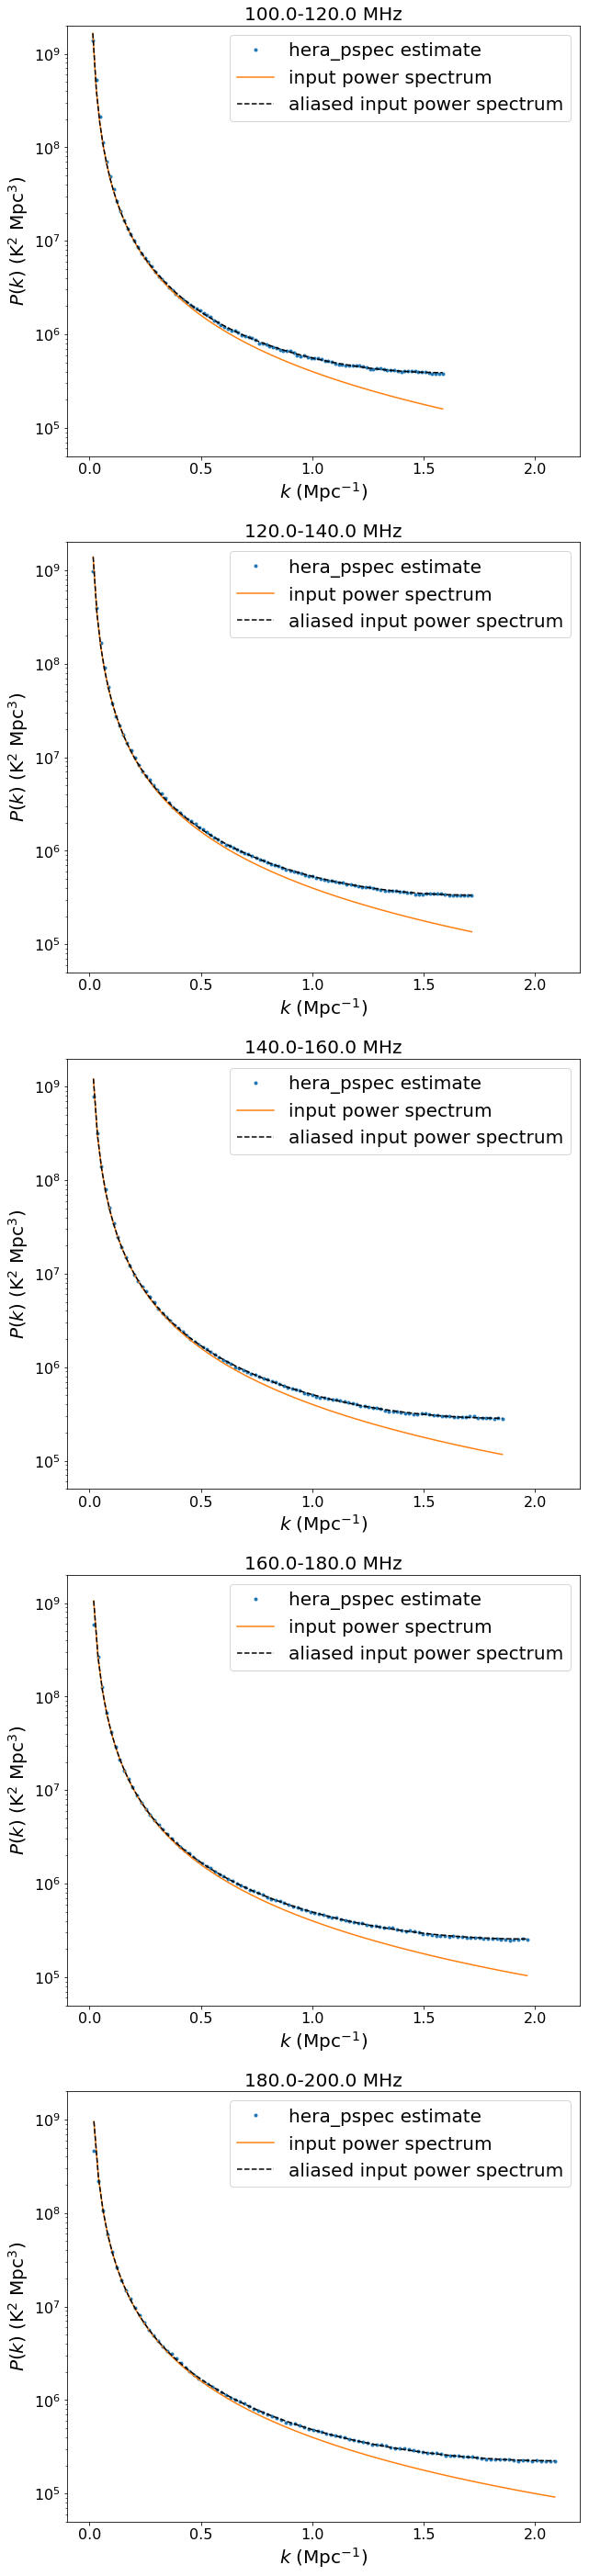

In [290]:
fig = plt.figure(figsize=(10,50))
for spw in pspec_est.keys():
    ax = fig.add_subplot(5,1,spw+1)
    ax.tick_params(labelsize=16)
    ax.plot(k_est[spw], pspec_est[spw], '.', label='hera_pspec estimate')
    ax.plot(k_est[spw], true_power_spectrum(k_est[spw]), label='input power spectrum')
    ax.plot(k_est[spw], aliased_power_spectrum(k_est[spw], k_nyquist[spw]), '--k', label='aliased input power spectrum')
    
    plt.yscale('log')
    plt.ylim(0.5e5,2e9)
    plt.xlim(-0.1,2.2)
    i0,i1 = spw_ranges[spw]
    spw_freqs = uvp.freq_array[i0:i1]
    z_mean = uvp.cosmo.f2z(np.mean(spw_freqs))
    
    nu0, nu1 = np.around(spw_freqs[0]*1e-6,0), np.around(spw_freqs[-1]*1e-6,0)
    title_str = '{0}-{1} MHz'.format(str(nu0), str(nu1))
    plt.title(title_str, fontsize=20)
    plt.xlabel(r'$k$ (Mpc$^{-1}$)', fontsize=20)
    plt.ylabel(r'$P(k)$ (K$^2$ Mpc$^3$)', fontsize=20)
    plt.legend(fontsize=20)
    
plt.show()

### Residuals using expected aliasing

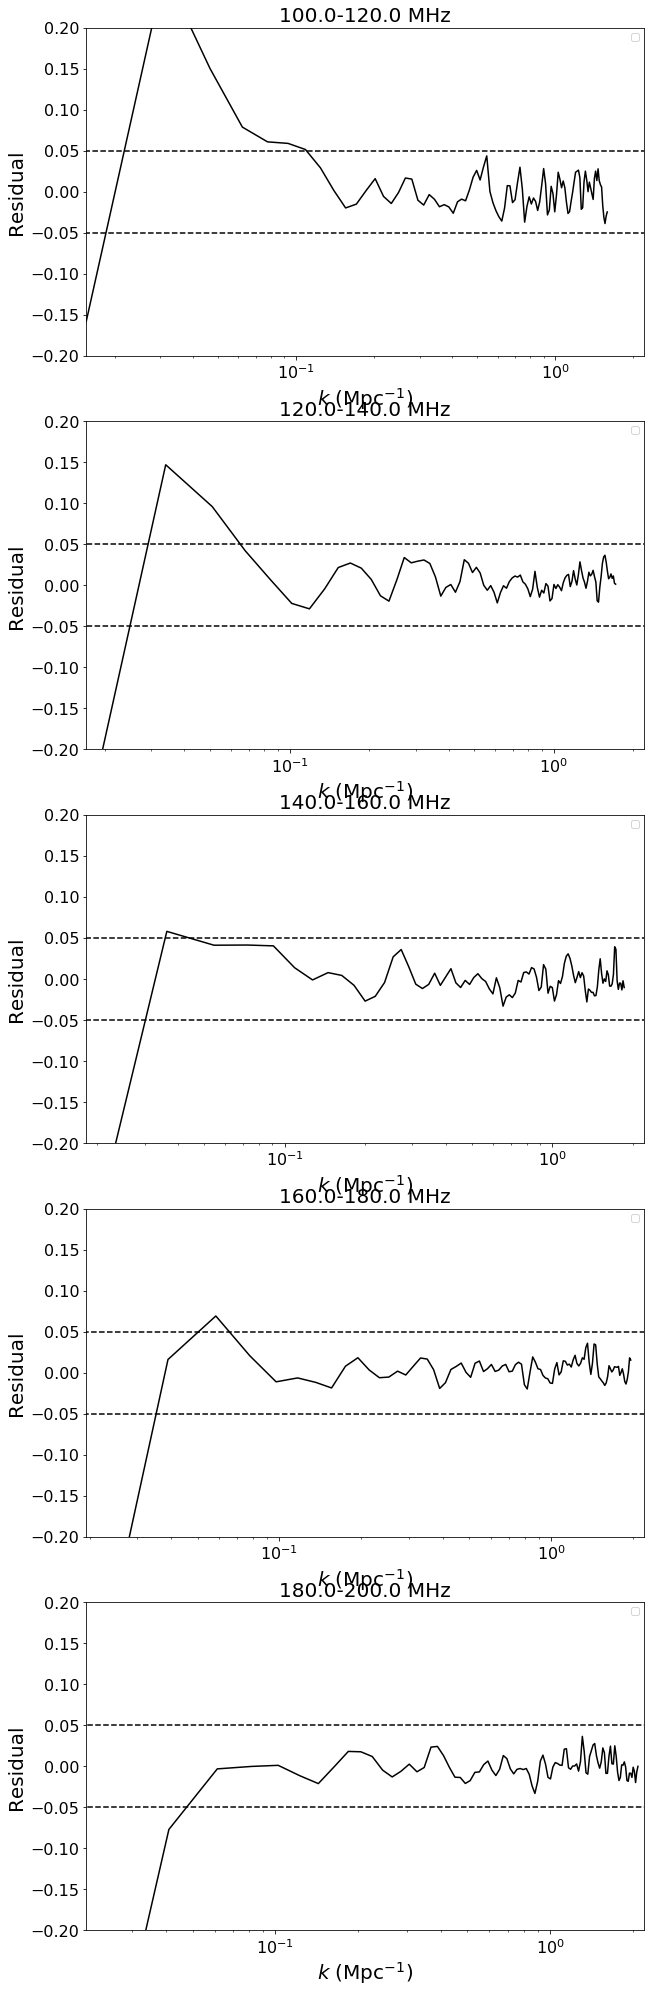

In [293]:
fig = plt.figure(figsize=(10,35))
for spw in pspec_est.keys():
    ax = fig.add_subplot(5,1,spw+1)
    ax.tick_params(labelsize=16)
    
    aliased_truth = aliased_power_spectrum(k_est[spw], ks_alt[spw])
    res_aliased = (pspec_est[spw] - aliased_truth)/aliased_truth

    ax.plot(k_est[spw], res_aliased, '-k')
    
    plt.hlines([-0.05,0.05],xmin=-0.1,xmax=2.2, linestyle='--')

    plt.ylim(-0.2,0.2)
    
    plt.xscale('log')
    plt.xlim(-0.1,2.2)
    
    plt.legend()
    
    i0,i1 = spw_ranges[spw]
    spw_freqs = uvp.freq_array[i0:i1]
    
    nu0, nu1 = np.around(spw_freqs[0]*1e-6,0), np.around(spw_freqs[-1]*1e-6,0)
    title_str = '{0}-{1} MHz'.format(str(nu0), str(nu1))
    plt.title(title_str, fontsize=20)
    
    plt.ylabel('Residual', fontsize=20)
    plt.xlabel(r'$k$ (Mpc$^{-1}$)', fontsize=20)
    
#     print np.std(all_res[spw].real), np.amax(all_res[spw].real)
plt.show()

## More realizations

In [496]:
uvp_avgs = {}

for rel in range(N_realizations):
    path = uvp_avg_data_paths[rel]
    
    uvp_avgs[rel] = hps.uvpspec.UVPSpec()
    uvp_avgs[rel].read_hdf5(path)

In [497]:
keys = uvp_avgs[0].get_all_keys()

In [498]:
pspec_est_rls, k_est = {}, {}

for spw_key in keys:
    spw = spw_key[0]
    
    k_est[spw] = uvp_avgs[0].get_kparas(spw, little_h=False)
    
    Nk = uvp_avgs[0].get_data(spw_key)[0].shape[0]
    pspec_est_rls[spw] = np.zeros((N_realizations, Nk), dtype=np.float64)
    
    for rr in range(N_realizations):
        pspec_est_rls[spw][rr] = uvp_avgs[rr].get_data(spw_key)[0].real

### Ensemble averaged estimates

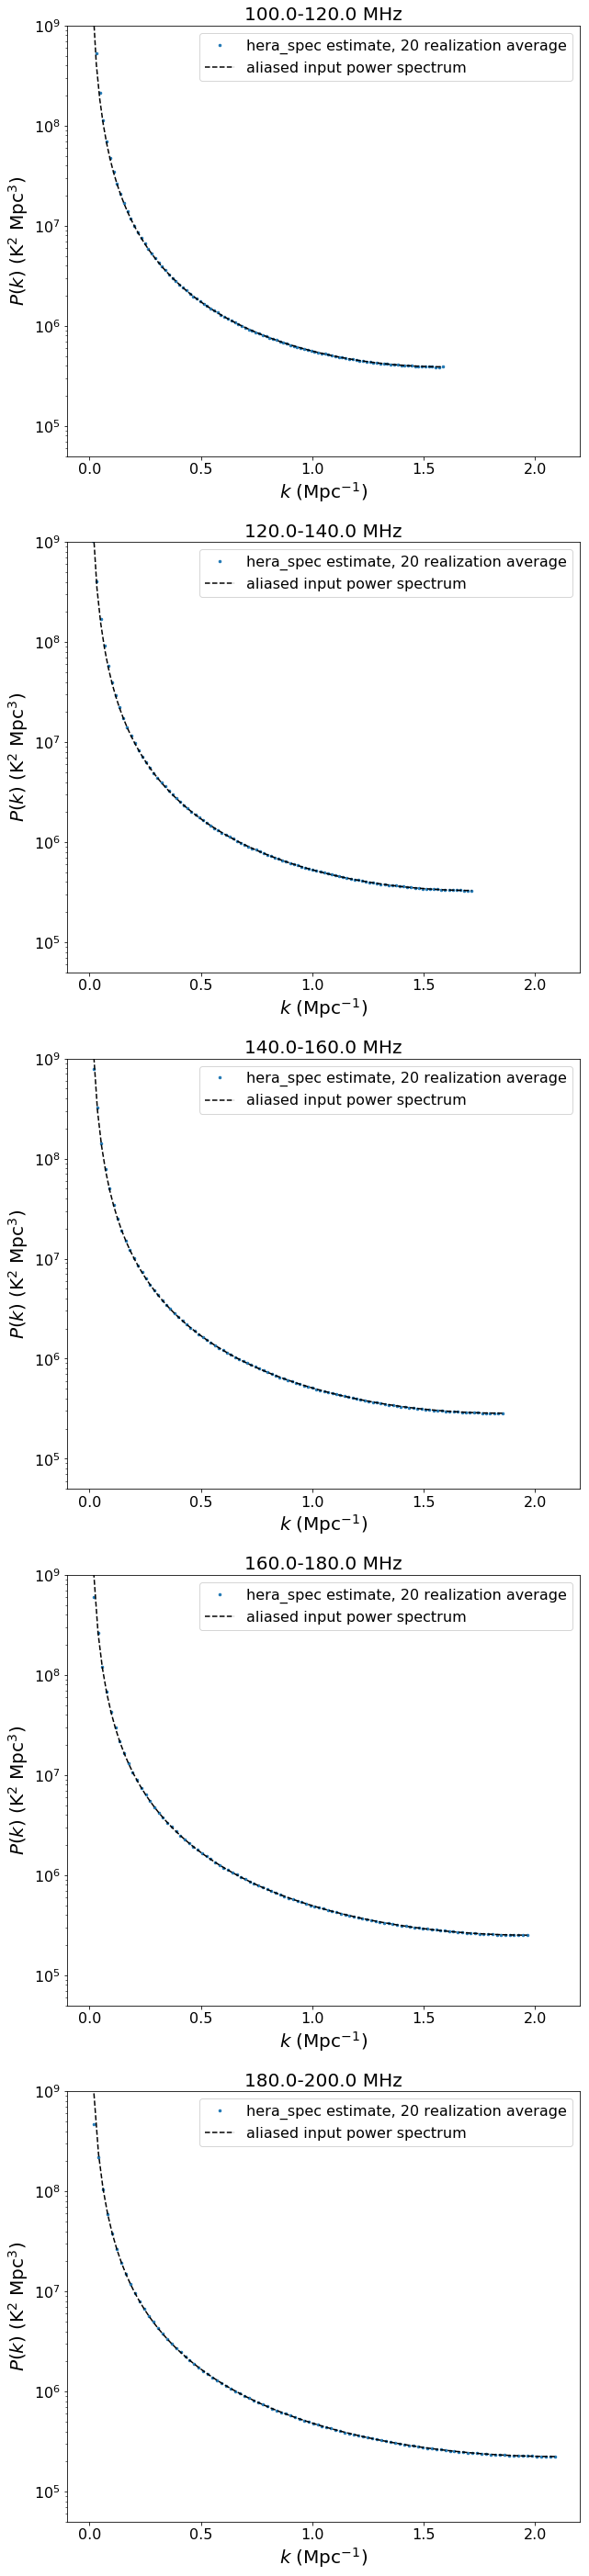

In [499]:
fig = plt.figure(figsize=(10,50))
for spw in pspec_est.keys():
    ax = fig.add_subplot(5,1,spw+1)
    ax.tick_params(labelsize=16)
#     for rr in range(20):
#         ax.plot(k_est[spw], pspec_est_rls[spw][rr], '-')
    ax.plot(k_est[spw], np.mean(pspec_est_rls[spw], axis=0), '.', ms=5, label='hera_spec estimate, 20 realization average')
    ax.plot(k_est[spw], aliased_power_spectrum(k_est[spw], ks_alt[spw]), '--k', label='aliased input power spectrum')
    
    plt.yscale('log')
    plt.ylim(0.5e5,1e9)
    
#     plt.xscale('log')
    plt.xlim(-0.1,2.2)
    
    i0,i1 = spw_ranges[spw]
    spw_freqs = uvp.freq_array[i0:i1]
    z_mean = uvp.cosmo.f2z(np.mean(spw_freqs))
    
    nu0, nu1 = np.around(spw_freqs[0]*1e-6,0), np.around(spw_freqs[-1]*1e-6,0)
    title_str = '{0}-{1} MHz'.format(str(nu0), str(nu1))
    plt.title(title_str, fontsize=20)
    plt.xlabel(r'$k$ (Mpc$^{-1}$)', fontsize=20)
    plt.ylabel(r'$P(k)$ (K$^2$ Mpc$^3$)', fontsize=20)
    plt.legend(fontsize=16)
    
plt.show()

### Enemble average residuals

In [500]:
pspec_res_rls = {}
sample_std = {}

for spw in pspec_est_rls:
    
    aliased_truth = aliased_power_spectrum(k_est[spw], ks_alt[spw])
    
    pspec_res_rls[spw] = np.zeros((N_realizations, pspec_est_rls[spw].shape[1]))
    
    for rr in range(N_realizations):
        pspec_res_rls[spw][rr] = (pspec_est_rls[spw][rr] - aliased_truth)/aliased_truth
        
    sample_std[spw] = np.std(pspec_res_rls[spw], axis=0, ddof=1)

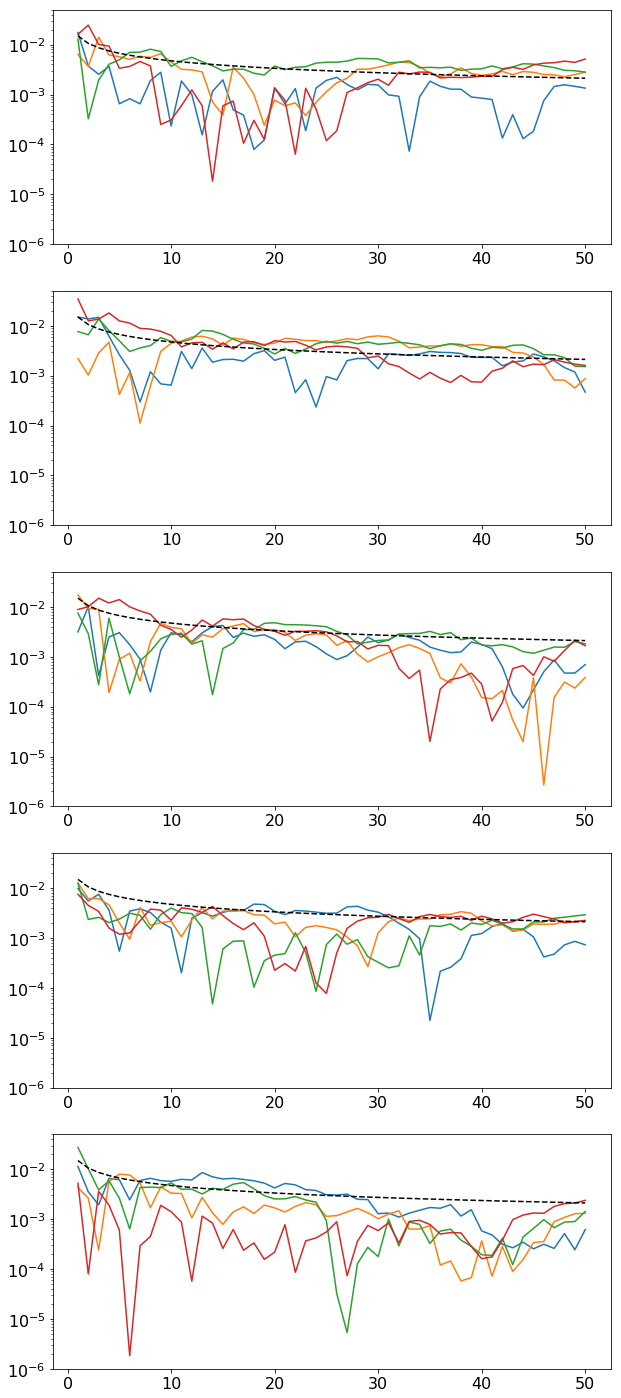

In [502]:
fig = plt.figure(figsize=(10,25))
for spw in pspec_res_rls:
    Nr, Nk = pspec_res_rls[spw].shape
    
    intg_mu_k = np.cumsum(pspec_res_rls[spw], axis=0)/(np.arange(Nr)+1.)[:,None]
    
    ax = fig.add_subplot(5,1,spw+1)
    ax.tick_params(labelsize=16)
    
    num_rel = np.arange(Nr)+1.
    
    for i_k in [30,50,70,90]:
        ax.plot(num_rel, np.abs(intg_mu_k[:,i_k]))
    
    ax.plot(num_rel, 0.015/np.sqrt(num_rel), '--k')
    
    plt.yscale('log')
    plt.ylim(1e-6,5e-2)   
#     plt.xscale('log')
plt.show()

In [503]:
from scipy import stats

In [504]:
from matplotlib.colors import from_levels_and_colors

In [505]:
test_cmap, test_norm = from_levels_and_colors([0., 1.], ['Crimson', 'RoyalBlue'], extend='max')

0.8747763158754935
0.7730604708656462
0.6980950832870639
0.7280735358094562
0.6989969886498387


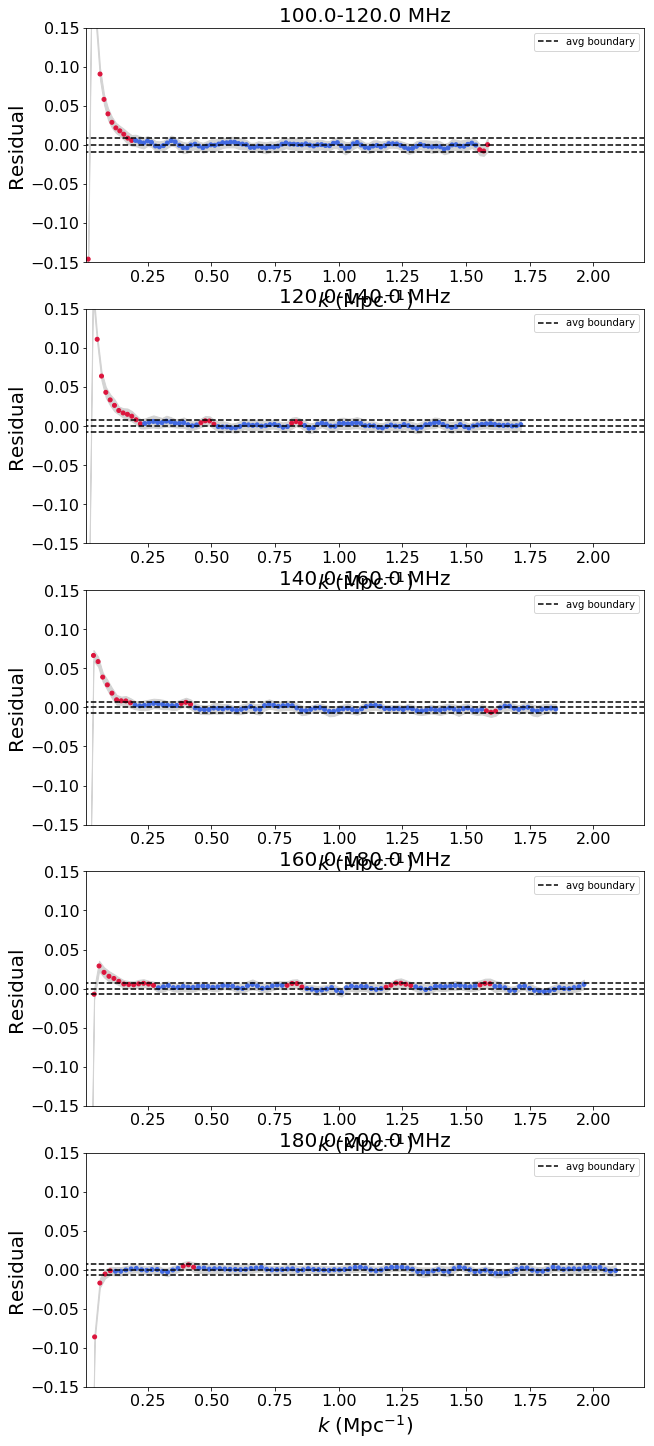

In [506]:
fig = plt.figure(figsize=(10,25))
for spw in pspec_res_rls:
    Nk = pspec_res_rls[spw].shape[1]
    mu_k, sigma_k, lower_k, upper_k, test_k = [np.zeros(Nk) for ii in range(5)]
    for i_k in range(Nk):
        mean_cntr, _, std_cntr = stats.bayes_mvs(pspec_res_rls[spw][:,i_k], alpha=0.99)
        
        sigma_k[i_k] = std_cntr[0]
        mu_k[i_k] = mean_cntr[0]
        lower_k[i_k] = mean_cntr[1][0]
        upper_k[i_k] = mean_cntr[1][1]
        
        if lower_k[i_k] < 0. and 0. < upper_k[i_k]:
            test_k[i_k] = 1.
        else:
            test_k[i_k] = 0.

    retest_k = np.zeros(Nk)
    for i_k in range(Nk):
        
        if i_k != 0 and i_k != Nk-1:
            if np.all(test_k[i_k-1:i_k+2]):
                retest_k[i_k] = 1.
                
        if i_k == 0:
            if np.all(test_k[:2]):
                retest_k[:2] = 1.
        
        if i_k == Nk-1:
            if np.all(test_k[-2:]):
                retest_k[-2:] = 1.
    
    avg_width = np.amax(upper_k[10:] - lower_k[10:])
    print avg_width/2. * 100.
    
    ax = fig.add_subplot(5,1,spw+1)
    ax.tick_params(labelsize=16)

#     ax.plot(k_est[spw], mu_k, '.k', label='mean')
    ax.fill_between(k_est[spw], lower_k, upper_k, color='LightGray')

    ax.scatter(k_est[spw], mu_k, s=16., c=retest_k, cmap=test_cmap, norm=test_norm)
    
    plt.hlines([-avg_width/2.,0.,avg_width/2.],xmin=-0.1,xmax=2.2, linestyle='--', label=r'avg boundary')
    plt.ylim(-0.15, 0.15)
#     plt.xscale('log')
    plt.xlim(np.amin(k_est[0])*0.5, 2.2)
    plt.legend()

    i0,i1 = spw_ranges[spw]
    spw_freqs = uvp.freq_array[i0:i1]

    nu0, nu1 = np.around(spw_freqs[0]*1e-6,0), np.around(spw_freqs[-1]*1e-6,0)
    title_str = '{0}-{1} MHz'.format(str(nu0), str(nu1))
    plt.title(title_str, fontsize=20)

    plt.ylabel('Residual', fontsize=20)
    plt.xlabel(r'$k$ (Mpc$^{-1}$)', fontsize=20)
        
plt.show()

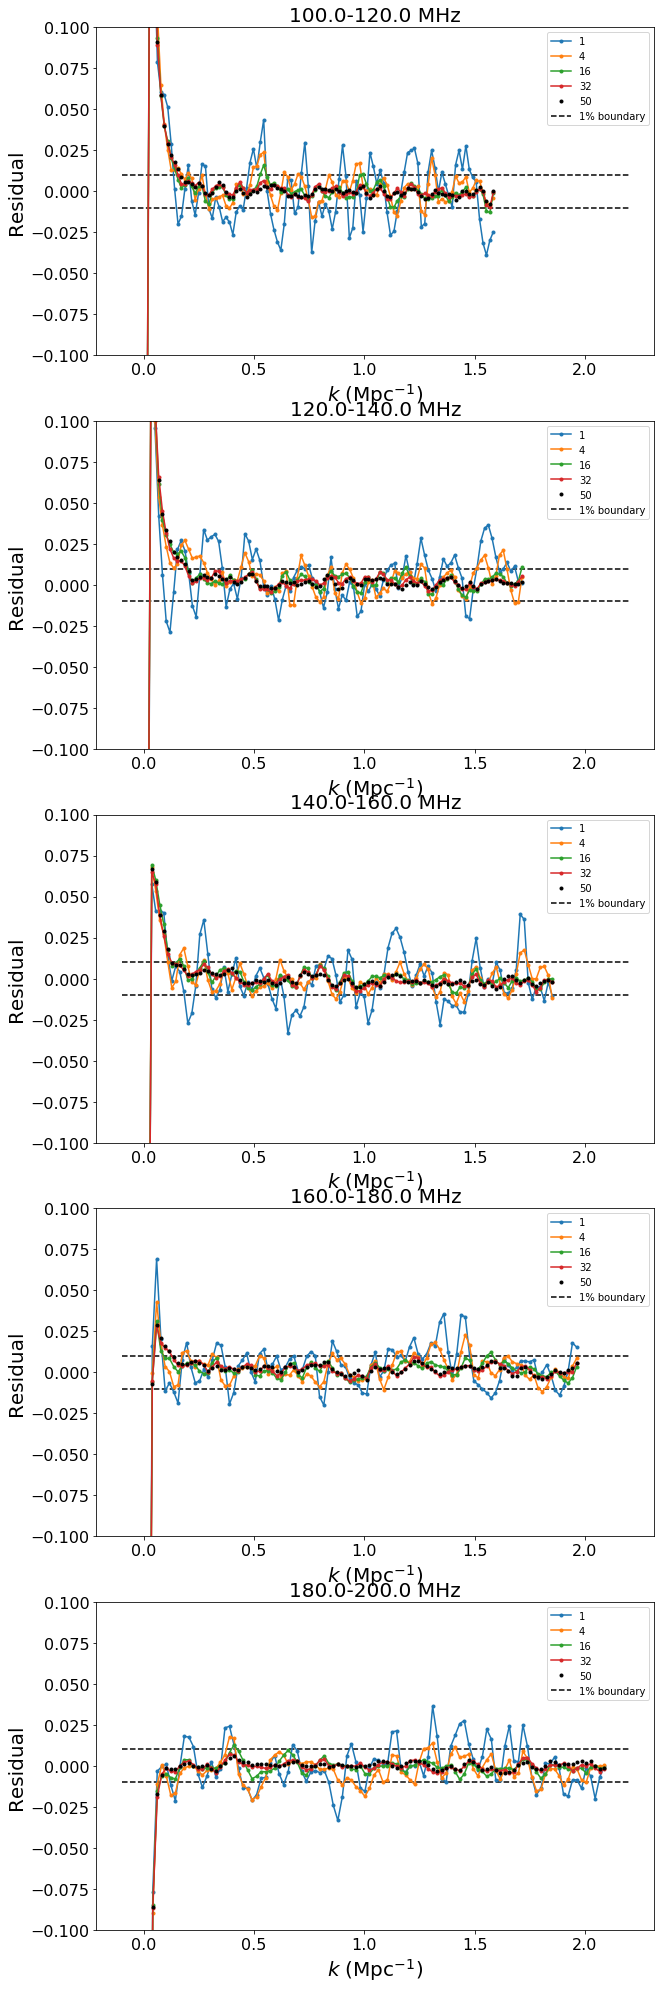

In [508]:
fig = plt.figure(figsize=(10,35))
for spw in pspec_res_rls:
    ax = fig.add_subplot(5,1,spw+1)
    ax.tick_params(labelsize=16)
    
    ind_cut = 0
    
    for nr in [1,4,16,32]:
        mu_k = np.mean(pspec_res_rls[spw][:nr,:], axis=0)

        ax.plot(k_est[spw][ind_cut:], mu_k[ind_cut:], '.-', label=str(nr))
        
    mu_k = np.mean(pspec_res_rls[spw], axis=0)

    ax.plot(k_est[spw][ind_cut:], mu_k[ind_cut:], '.k', label=str(N_realizations))
    
    
    plt.hlines([-0.01,0.01],xmin=-0.1,xmax=2.2, linestyle='--', label=r'1% boundary')

    plt.ylim(-0.1,0.1)
#     plt.xlim(0.8e-1, 2.2)
#     plt.xscale('log')
    
    plt.legend()
    
    i0,i1 = spw_ranges[spw]
    spw_freqs = uvp.freq_array[i0:i1]
    
    nu0, nu1 = np.around(spw_freqs[0]*1e-6,0), np.around(spw_freqs[-1]*1e-6,0)
    title_str = '{0}-{1} MHz'.format(str(nu0), str(nu1))
    plt.title(title_str, fontsize=20)
    
    plt.ylabel('Residual', fontsize=20)
    plt.xlabel(r'$k$ (Mpc$^{-1}$)', fontsize=20)
    
plt.show()

### Histograms of residuals over ensemble and $k$

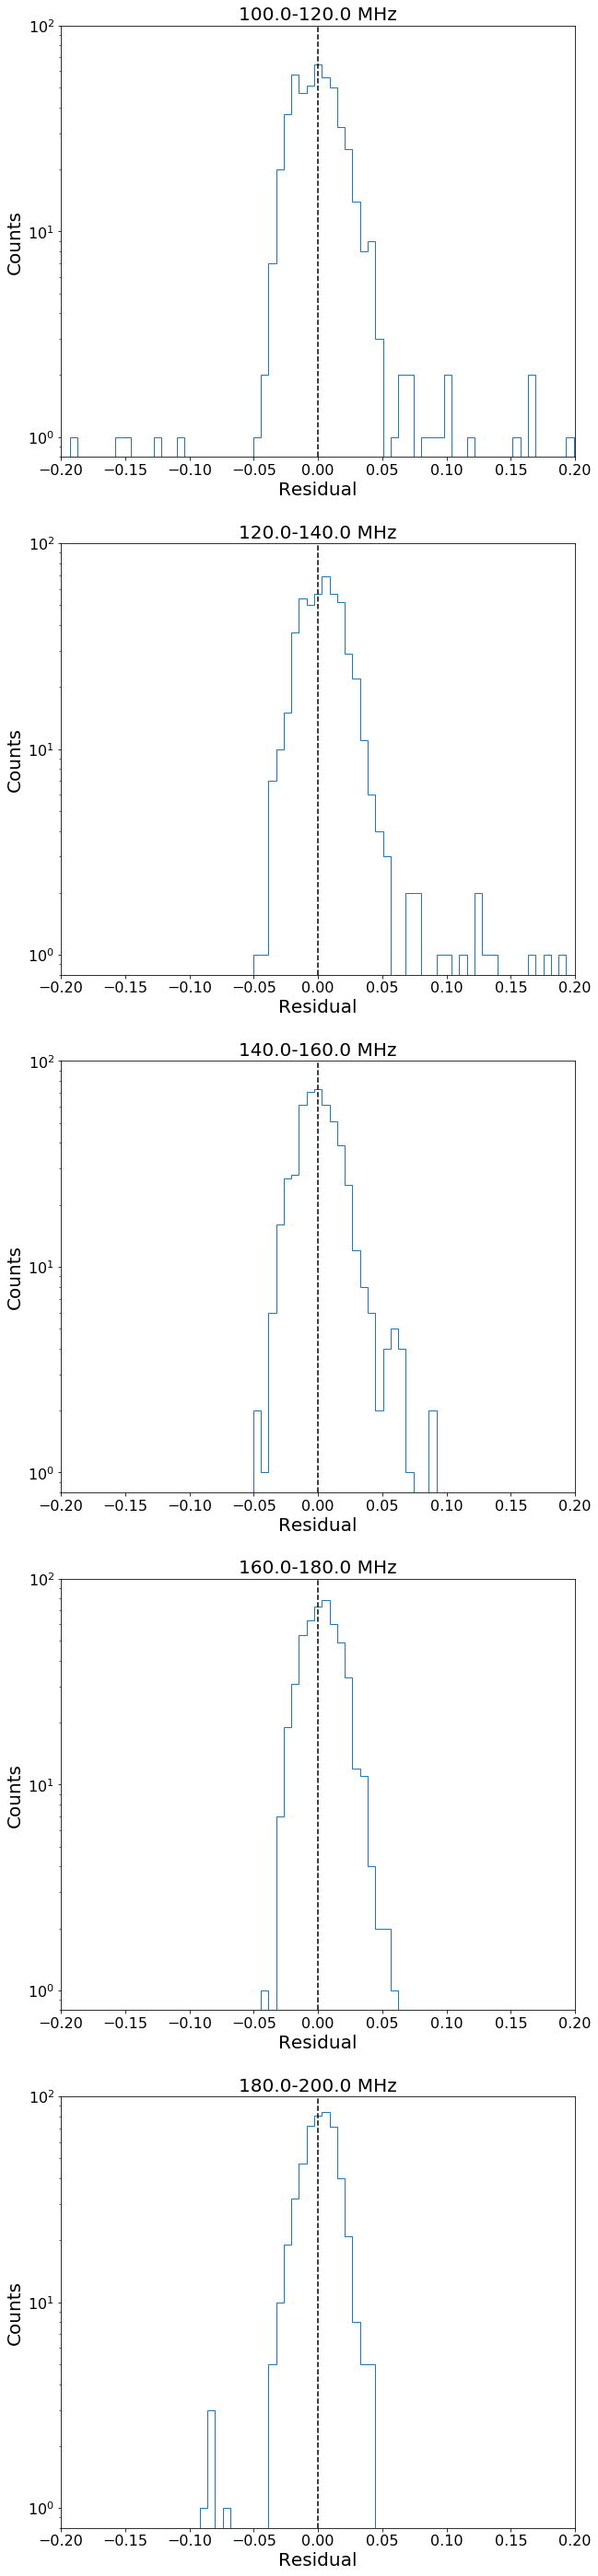

In [288]:
fig = plt.figure(figsize=(10,50))
for spw in pspec_res_rls:
    ax = fig.add_subplot(5,1,spw+1)
    ax.tick_params(labelsize=16)
    
    ax.hist(pspec_res_rls[spw][10:-5,:].flatten(), range=(-0.3,0.3), bins=101, histtype='step')
    
    ax.vlines([0.], ymin=0.8, ymax=1e2, linestyle='--', color='k')
    plt.xlim(-0.2,0.2)
    plt.yscale('log')
    plt.ylim(0.8, 1e2)
    
    i0,i1 = spw_ranges[spw]
    spw_freqs = uvp.freq_array[i0:i1]
    
    nu0, nu1 = np.around(spw_freqs[0]*1e-6,0), np.around(spw_freqs[-1]*1e-6,0)
    title_str = '{0}-{1} MHz'.format(str(nu0), str(nu1))
    plt.title(title_str, fontsize=20)
    
    plt.ylabel('Counts', fontsize=20)
    plt.xlabel('Residual', fontsize=20)

plt.show()